# WeatherPy
----

#### Description
This notebook contains Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. A set of various latitudes and longitudes are selected and the nearest cities to these latitude longitude pairs is identified using citipy module. Once a list of unique cities accross the globe is identified, the temperature, humidity, cloudiness and wind speeds at these locations is retrived using an API call. The weather is then shown as 4 different plots.

In [105]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
from datetime import date


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [106]:
# List for holding lat_lngs and cities
lat_lngs = []
cities_countries = []
cities = []
temp = []


# Create a list of lat and lng
lats = list(range(-90, 90, 5))
lngs = list(range(-180, 180, 5))


In [107]:
# Identify nearest city for each lat, lng combination
for lng in lngs:
    for lat in lats:
        city = citipy.nearest_city(lat, lng)
        name_of_city = city.city_name
    
        # If the city is unique, then add it to a our cities list
        if name_of_city not in cities:
            cities.append(name_of_city)
            cities_countries.append((city.city_name, city.country_code))


In [108]:
def get_weather_json(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/weather"
    r = requests.get(url, params={"appid": api_key,"q": city, "units":"imperial"})
    if r.status_code == 200:
        r_json = r.json()
        return r_json
    else:
        return None

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [109]:
out_cities = []
print("Beginning data retreival")
i=0
for in_city in cities:
    i+=1
    print(f"Processing Record {i} for city {in_city}")
    out_city = get_weather_json(in_city, api_key)
    #print(out_city)
    if out_city:
        out_cities.append(out_city)
    else:
        print("city not found: skipping data")
out_cities_stored = pd.DataFrame(out_cities)


Beginning data retreival
Processing Record 1 for city vaini
Processing Record 2 for city halalo
city not found: skipping data
Processing Record 3 for city vaitupu
city not found: skipping data
Processing Record 4 for city kapaa
Processing Record 5 for city provideniya
Processing Record 6 for city egvekinot
Processing Record 7 for city mys shmidta
city not found: skipping data
Processing Record 8 for city pangai
Processing Record 9 for city hihifo
city not found: skipping data
Processing Record 10 for city alofi
Processing Record 11 for city satitoa
city not found: skipping data
Processing Record 12 for city samalaeulu
city not found: skipping data
Processing Record 13 for city saleaula
city not found: skipping data
Processing Record 14 for city bethel
Processing Record 15 for city lavrentiya
Processing Record 16 for city mataura
Processing Record 17 for city avarua
Processing Record 18 for city samusu
city not found: skipping data
Processing Record 19 for city makakilo city
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [110]:
#import pprint
#pprint.pprint(out_cities, indent=4)
cleaned_out_cities = [{
    "Name": d["name"],
    "Temp": d["main"]["temp"],
    "Cloudiness": d["clouds"]["all"],
    "Country": d["sys"]["country"],
    "Date": date.fromtimestamp(d['dt']).isoformat(),
    "Humidity": d["main"]["humidity"],
    "Lat": d["coord"]["lat"],
    "Lng": d["coord"]["lon"],
    "Max Temp": d["main"]["temp_max"],
    "Wind Speed": d["wind"]["speed"]
} for d in out_cities]
df=pd.DataFrame(cleaned_out_cities)

f = open(output_data_file, "+w")
df.to_csv(f)
f.close()
df.head()

,Name,Temp,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,64.36,0,IN,2019-12-30,85,15.34,74.49,64.36,2.75
1,Kapaa,77.90,90,US,2019-12-30,74,22.08,-159.32,78.80,14.99
2,Provideniya,-5.80,0,RU,2019-12-30,63,64.42,-173.23,-5.80,20.13
3,Egvekinot,-26.77,0,RU,2019-12-30,87,66.32,-179.17,-26.77,7.76
4,Pangai,80.98,100,TO,2019-12-30,82,-19.80,-174.35,80.98,32.70


### Plotting the Data

#### Latitude vs. Temperature Plot

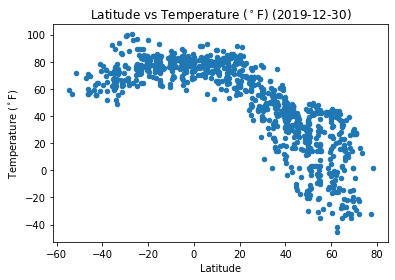

In [113]:
def plot_graph(df, x, y):
    df.plot.scatter(x = x, y = y)
   


plot_graph(df, 'Lat', 'Temp')
plt.ylabel('Temperature ($^\circ$F)')
plt.xlabel('Latitude')
plt.title("Latitude vs Temperature ($^\circ$F) ({})".format(df["Date"][0]))
plt.savefig("Lat_vs_Temp.png")
plt.show()

#### Latitude vs. Humidity Plot

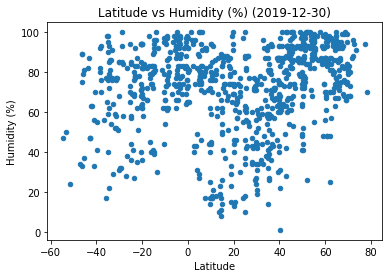

In [114]:
plot_graph(df, 'Lat', 'Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title("Latitude vs Humidity (%) ({})".format(df["Date"][0]))
plt.savefig("Lat_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

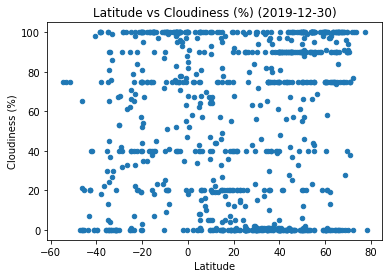

In [115]:
plot_graph(df, 'Lat', 'Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title("Latitude vs Cloudiness (%) ({})".format(df["Date"][0]))
plt.savefig("Lat_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

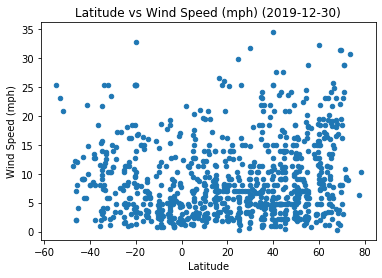

In [116]:
plot_graph(df, 'Lat', 'Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title("Latitude vs Wind Speed (mph) ({})".format(df["Date"][0]))
plt.savefig("Lat_vs_WindSpeed.png")
plt.show()

### Observations

* The plot Latitude versus temperature shows that as we go away from the equator, the temperature starts decreasing.
* The temperatures are lot cooler in the northern hemisphere compared to southern hemisphere. This is because the northern hemisphere is in winter season and southern is in summer.
* Majority of the cities have wind speeds in the range of 0 mph to 10 mph regardless of the latitude.
* The cloudiness accross the globe seems to vary in steps. You can observe this as horizontal lines on the plot Latitude verses cloudiness.
* Majority of the cities have humidity in the range of 60% to 100% regardless of the latitude.
